In [3]:
!pip install -qqq mrjob

In [ ]:
%%file task1.py

import argparse
from mrjob.job import MRJob, MRStep
from collections import defaultdict

class MRTopQuoteCount(MRJob):
    def mapper_init(self):
        self.cnt = defaultdict(int)

    def mapper(self, _, line):
        if not line.startswith('"character" "dialogue"'):
            _, character, _ = line.split(" ", 2)
            self.cnt[character.strip('"').strip("\\")] += 1

    def mapper_final(self):
        yield from self.cnt.items()

    def reducer_aggregate(self, character, counts):
        yield None, (character, sum(counts))

    def reducer(self, _, pairs):
        char2cnt = [(p[0], p[1]) for p in pairs]
        yield from sorted(char2cnt, key=lambda x: -x[1])[:20]

    def steps(self):
        return [
            MRStep(
                mapper_init=self.mapper_init,
                mapper=self.mapper,
                mapper_final=self.mapper_final,
                reducer=self.reducer_aggregate,
            ),
            MRStep(reducer=self.reducer)
        ]

if __name__ == "__main__":
    MRTopQuoteCount.run()

Overwriting task1.py


In [185]:
!python3 task1.py ../sw-data/SW_EpisodeIV.txt > res4.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.192807.049708
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.192807.049708/output
Streaming final output from /tmp/task1.root.20231206.192807.049708/output...
Removing temp directory /tmp/task1.root.20231206.192807.049708...


In [186]:
!python3 task1.py ../sw-data/SW_EpisodeV.txt > res5.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.192807.862369
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.192807.862369/output
Streaming final output from /tmp/task1.root.20231206.192807.862369/output...
Removing temp directory /tmp/task1.root.20231206.192807.862369...


In [187]:
!python3 task1.py ../sw-data/SW_EpisodeVI.txt > res6.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.192808.283099
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.192808.283099/output
Streaming final output from /tmp/task1.root.20231206.192808.283099/output...
Removing temp directory /tmp/task1.root.20231206.192808.283099...


In [188]:
!cat ../sw-data/SW_Episode*.txt > ../sw-data/SW_full.txt

In [189]:
!python3 task1.py ../sw-data/SW_full.txt > res_full.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231206.192808.961280
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231206.192808.961280/output
Streaming final output from /tmp/task1.root.20231206.192808.961280/output...
Removing temp directory /tmp/task1.root.20231206.192808.961280...


In [190]:
!pip install -qqq matplotlib

In [217]:
import matplotlib.pyplot as plt


def print_result(result, ep):
    with open(result, "r") as file:
        lines = file.readlines()
    names, counts = zip(*(line.split() for line in lines))
    counts = [int(i) for i in counts]
    plt.figure(figsize=(18, 6))
    plt.bar(names, counts)
    plt.xlabel('Character')
    plt.xticks(rotation='vertical')
    plt.ylabel('Quote count')
    plt.title(f'Most talkative characters. {ep}')
    plt.savefig(f'{ep}.png')
    plt.show()

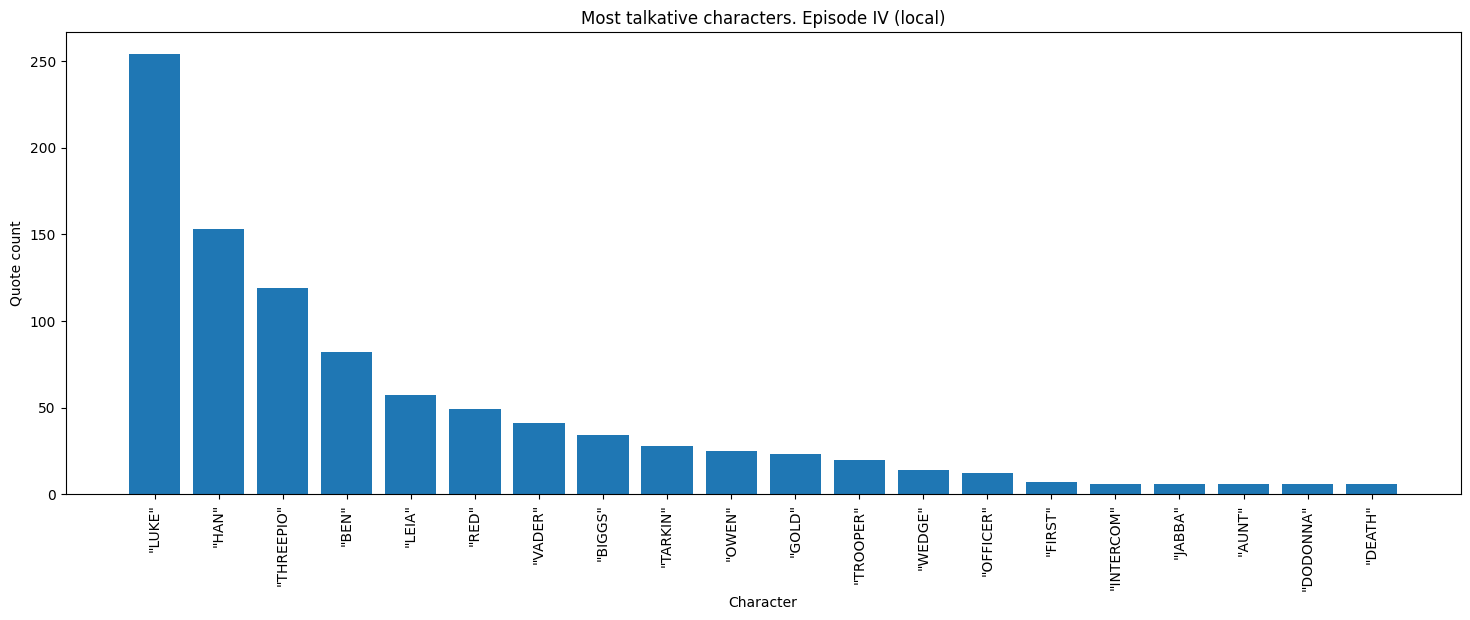

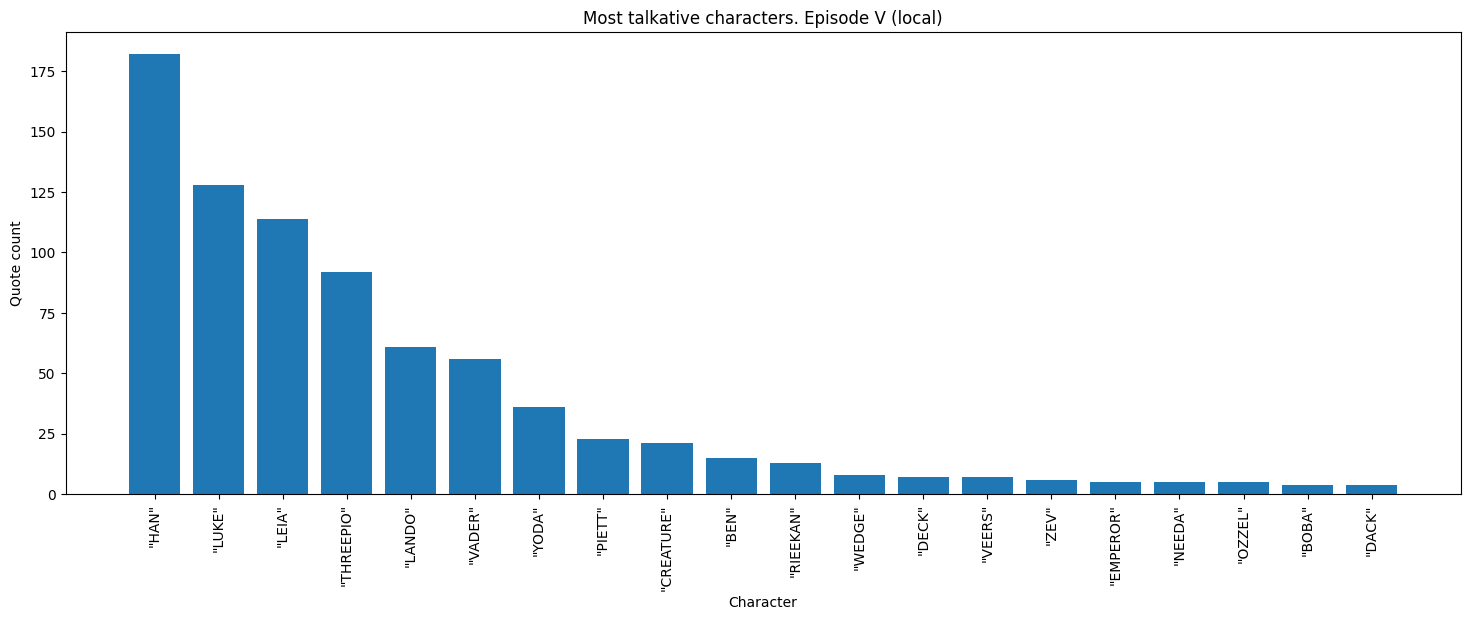

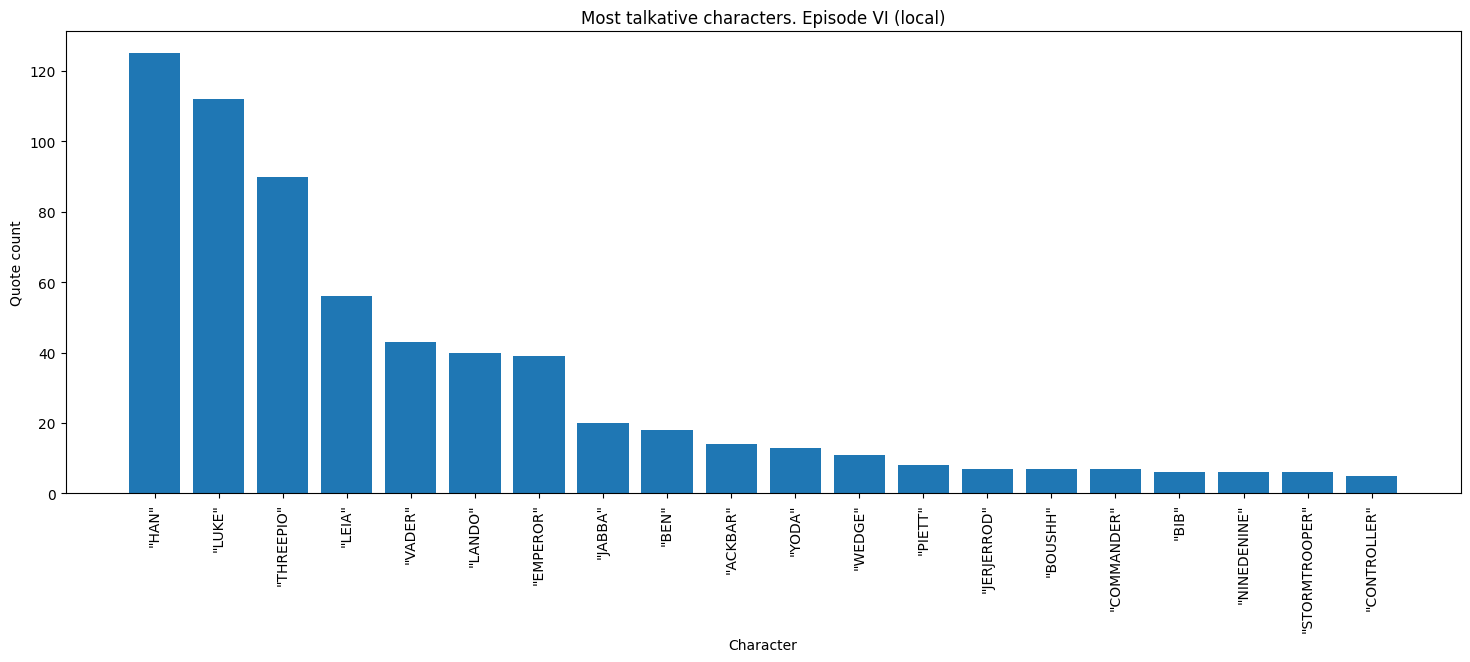

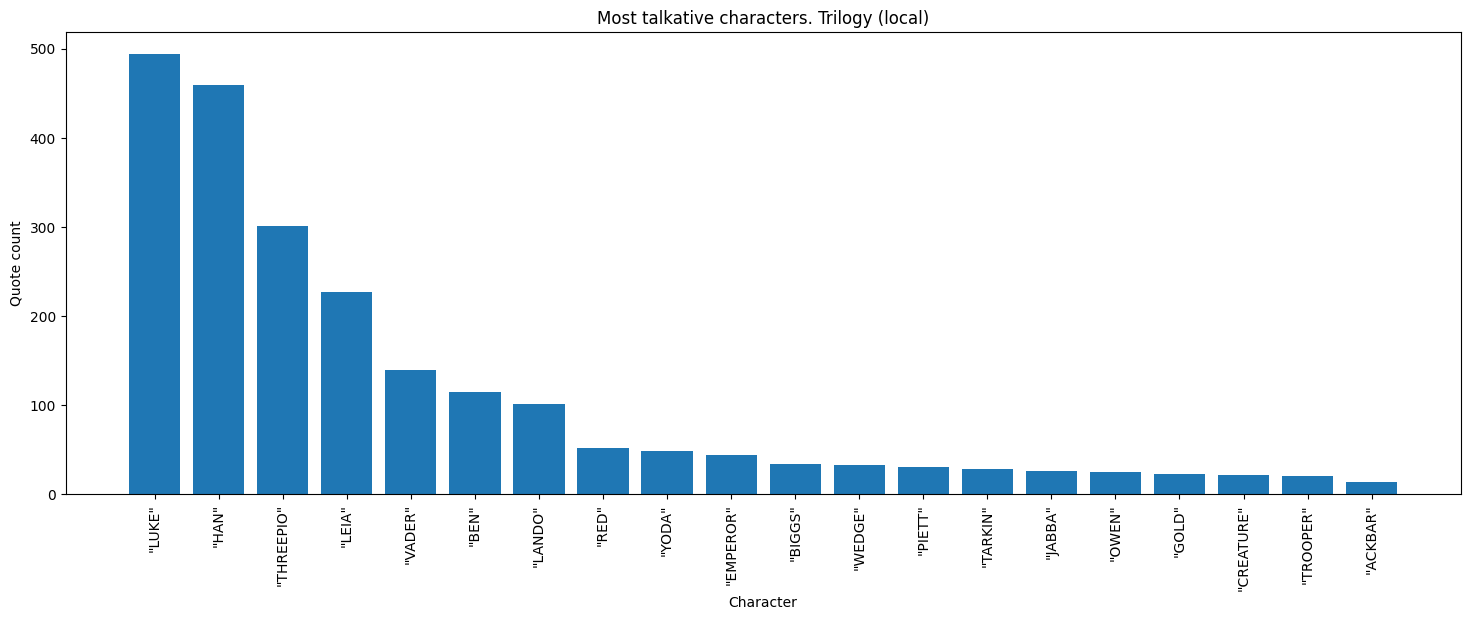

In [218]:
import os

results = [
    ('res4.txt', 'Episode IV (local)'),
    ('res5.txt', 'Episode V (local)'),
    ('res6.txt', 'Episode VI (local)'),
    ('res_full.txt', 'Trilogy (local)'),
]

for r, ep in results:
    print_result(r, ep)

In [193]:
!hadoop fs -put ../sw-data/SW_EpisodeIV.txt /SW_EpisodeIV.txt
!hadoop fs -put ../sw-data/SW_EpisodeV.txt /SW_EpisodeV.txt
!hadoop fs -put ../sw-data/SW_EpisodeVI.txt /SW_EpisodeVI.txt
!hadoop fs -put ../sw-data/SW_full.txt /SW_full.txt

2023-12-06 22:36:44 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 22:36:46 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 22:36:47 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 22:36:48 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [195]:
!hadoop fs -ls /

2023-12-06 22:36:59 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 7 items
-rw-r--r--   3 root supergroup      78278 2023-12-06 22:36 /SW_EpisodeIV.txt
-rw-r--r--   3 root supergroup      55487 2023-12-06 22:36 /SW_EpisodeV.txt
-rw-r--r--   3 root supergroup      48176 2023-12-06 22:36 /SW_EpisodeVI.txt
-rw-r--r--   3 root supergroup     181941 2023-12-06 22:36 /SW_full.txt
-rw-r--r--   3 root supergroup        449 2023-12-06 01:20 /testing-hadoop.txt
drwxr-xr-x   - root supergroup          0 2023-12-04 02:50 /tmp
drwxr-xr-x   - root supergroup          0 2023-12-04 02:49 /user


In [204]:
!python3 task1.py -r hadoop hdfs://namenode:8020/SW_EpisodeIV.txt --output /SW_output_ep4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231206.194900.128194
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.194900.128194/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.194900.128194/files/
Running step 1 of 2...
  Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
  packageJobJar: [/tmp/hadoop-unjar6316173598584061748/] [] /tmp/streamjob517310069144935662.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.21.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.21.0.4:8032
  Disabling 

In [205]:
!hadoop fs -cat /SW_output_ep4/part-00000

2023-12-06 22:49:40 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
"LUKE"	254
"HAN"	153
"THREEPIO"	119
"BEN"	82
"LEIA"	57
"RED"	49
"VADER"	41
"BIGGS"	34
"TARKIN"	28
"OWEN"	25
"GOLD"	23
"TROOPER"	20
"WEDGE"	14
"OFFICER"	12
"FIRST"	7
"JABBA"	6
"INTERCOM"	6
"GREEDO"	6
"DODONNA"	6
"DEATH"	6


In [208]:
!hadoop fs -get /SW_output_ep4/part-00000 ./hadoop_ep4

2023-12-06 22:50:45 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [209]:
!python3 task1.py -r hadoop hdfs://namenode:8020/SW_EpisodeV.txt --output /SW_output_ep5
!hadoop fs -get /SW_output_ep5/part-00000 ./hadoop_ep5

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231206.195122.167910
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.195122.167910/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.195122.167910/files/
Running step 1 of 2...
  Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
  packageJobJar: [/tmp/hadoop-unjar4482291809100577866/] [] /tmp/streamjob3009450584503078617.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.21.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.21.0.4:8032
  Disabling

In [210]:
!python3 task1.py -r hadoop hdfs://namenode:8020/SW_EpisodeVI.txt --output /SW_output_ep6
!hadoop fs -get /SW_output_ep5/part-00000 ./hadoop_ep6

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231206.195204.229582
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.195204.229582/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.195204.229582/files/
Running step 1 of 2...
  Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
  packageJobJar: [/tmp/hadoop-unjar5306604305087960571/] [] /tmp/streamjob8884152747817126687.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.21.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.21.0.4:8032
  Disabling

In [211]:
!python3 task1.py -r hadoop hdfs://namenode:8020/SW_full.txt --output /SW_output_full
!hadoop fs -get /SW_output_ep5/part-00000 ./hadoop_full

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231206.195245.343571
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.195245.343571/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231206.195245.343571/files/
Running step 1 of 2...
  Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
  packageJobJar: [/tmp/hadoop-unjar1965902313670352927/] [] /tmp/streamjob2934295527699242718.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.21.0.4:8032
  Connecting to ResourceManager at resourcemanager/172.21.0.4:8032
  Disabling

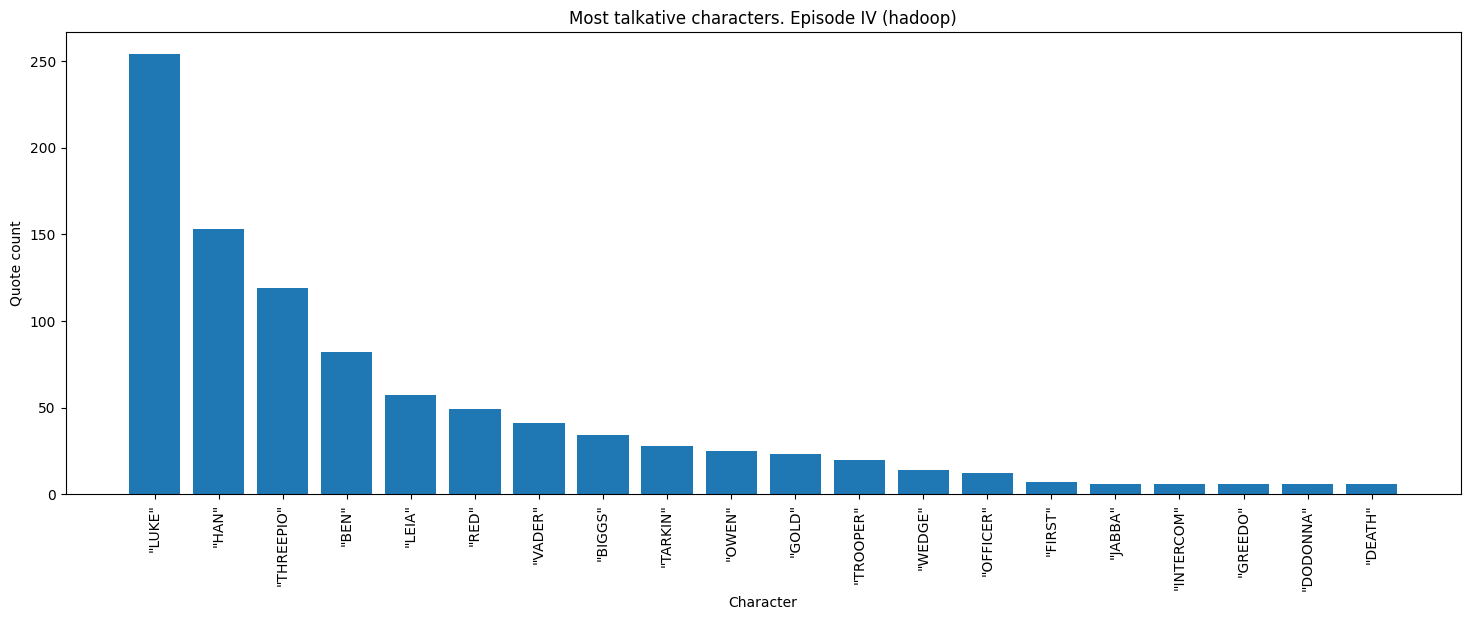

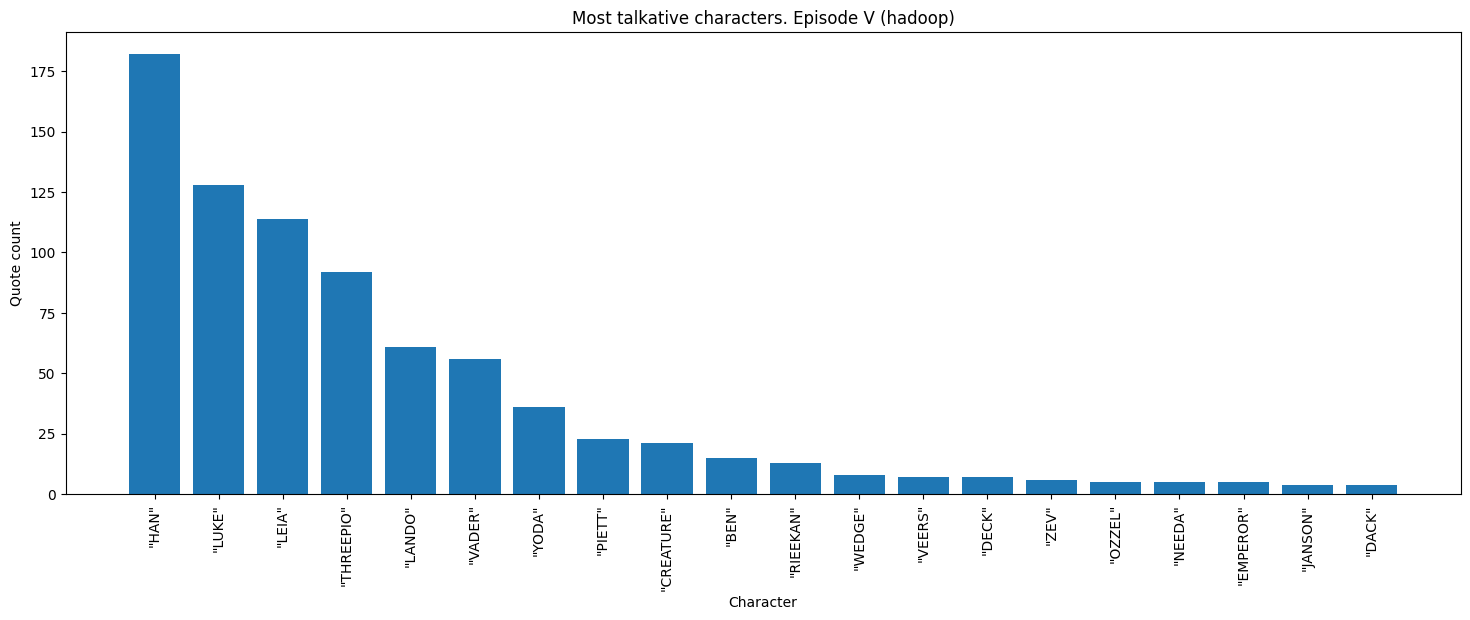

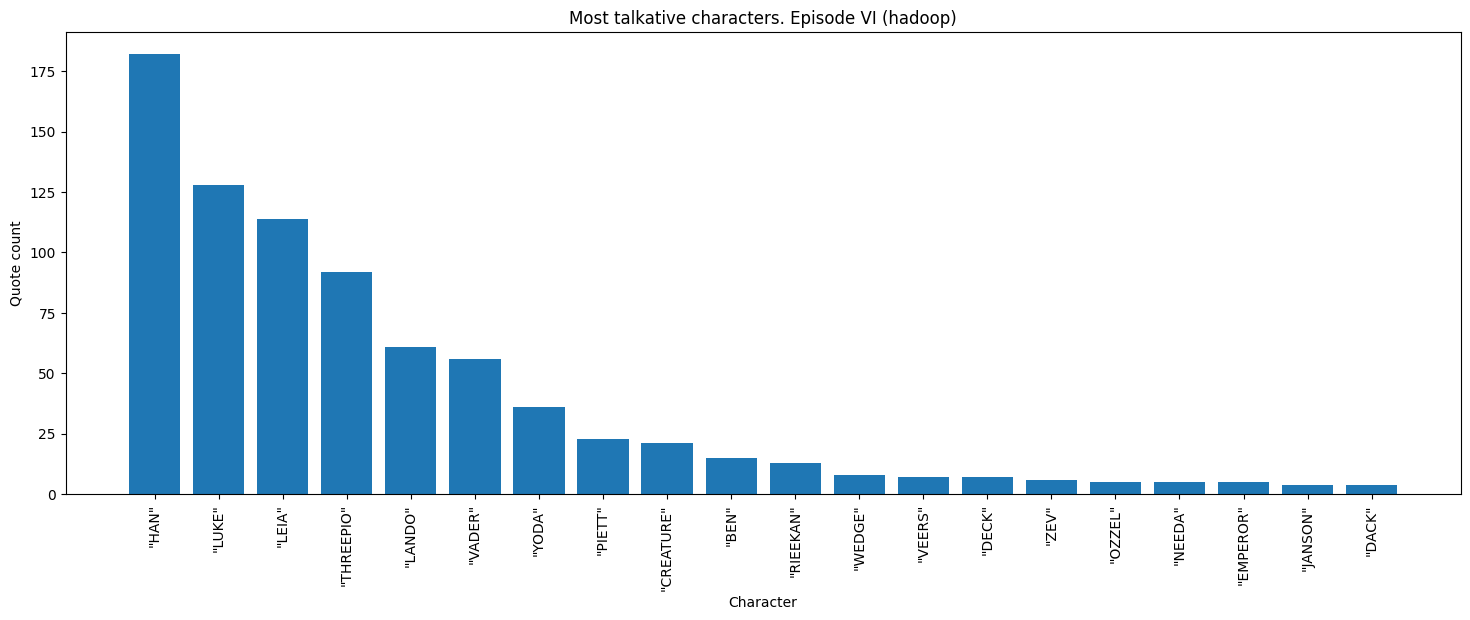

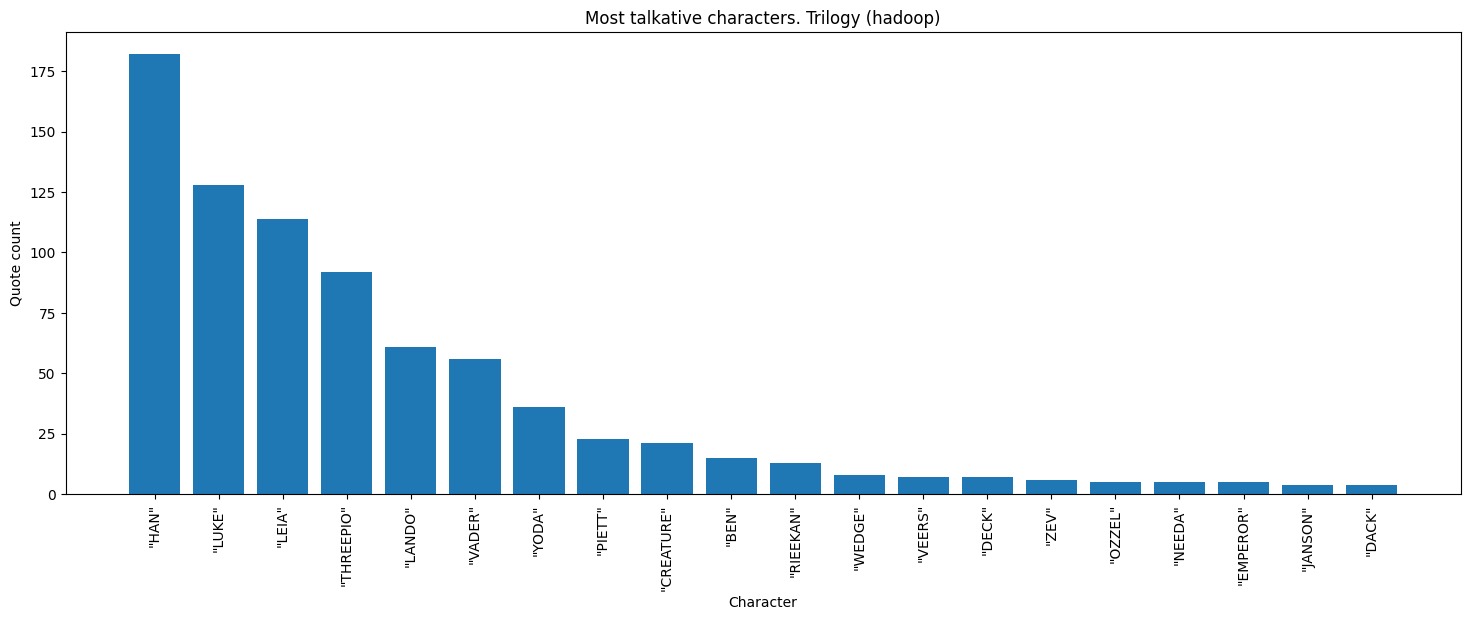

In [219]:
results = [
    ('hadoop_ep4', 'Episode IV (hadoop)'),
    ('hadoop_ep5', 'Episode V (hadoop)'),
    ('hadoop_ep6', 'Episode VI (hadoop)'),
    ('hadoop_full', 'Trilogy (hadoop)'),
]

for r, ep in results:
    print_result(r, ep)